In [3]:
#import

In [4]:
from pandasql import sqldf
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#data

In [6]:
project_data = pd.read_excel('../data/TEIS-NSS Project Data 10-2022.xlsx', 
                             sheet_name=['ECO with Exit21-22', 'Elig Timeline Rpt 2018-2022'])

eco_exit = project_data.get('ECO with Exit21-22')
elig_timeline = project_data.get('Elig Timeline Rpt 2018-2022')
print(eco_exit)
print(elig_timeline)

                                               DISTRICT  CHILD_ID  \
0                                                    ET  500335.0   
1                                                    ET  479453.0   
2                                                    ET  510663.0   
3                                                    ET  452482.0   
4                                                    ET  506507.0   
...                                                 ...       ...   
8631                                                 UC  514216.0   
8632                                                NaN       NaN   
8633                                                NaN       NaN   
8634                                                NaN       NaN   
8635  9/29/22 JM Corrected in TEIDS. Progress would ...       NaN   

     ECO_Entry_DATE  Ent SOCIAL_SCALE  Ent KNOWLEDGE_SCALE  \
0        2021-04-23               5.0                  3.0   
1        2020-03-23               7.0          

In [7]:
#rename

In [8]:
eco_exit = eco_exit.rename(columns={'DISTRICT':'district',
                                    'CHILD_ID':'child_id',
                                    'ECO_Entry_DATE':'eco_entry_date',
                                    'Ent SOCIAL_SCALE':'ent_social',
                                    'Ent KNOWLEDGE_SCALE':'ent_knowledge',
                                    'Ent APPROPRIATE_ACTION_SCALE':'ent_approp_action',
                                    'ECO_Exit_DATE':'eco_exit_date',
                                    'Exit SOCIAL_SCALE':'exit_social',
                                    'Exit KNOWLEDGE_SCALE':'exit_knowledge',
                                    'Exit APPROPRIATE_ACTION_SCALE':'exit_approp_action',
                                    'Days btw I-IFSP to Exit ECO' :'DBIexit'})

In [9]:
#ent_social = 3

In [10]:
eco_exit_1 = eco_exit[eco_exit['ent_social'] == 3.0]
eco_exit_1 = eco_exit

In [11]:
#eco_exit1 iloc

In [12]:
eco_exit1 = eco_exit.iloc[[3,4,5,7,8,9]]
print(eco_exit_1)

                                               district  child_id  \
0                                                    ET  500335.0   
1                                                    ET  479453.0   
2                                                    ET  510663.0   
3                                                    ET  452482.0   
4                                                    ET  506507.0   
...                                                 ...       ...   
8631                                                 UC  514216.0   
8632                                                NaN       NaN   
8633                                                NaN       NaN   
8634                                                NaN       NaN   
8635  9/29/22 JM Corrected in TEIDS. Progress would ...       NaN   

     eco_entry_date  ent_social  ent_knowledge  ent_approp_action  \
0        2021-04-23         5.0            3.0                4.0   
1        2020-03-23         7.0  

In [13]:
#eco_exit2

In [14]:
eco_exit_2 = eco_exit[eco_exit['ent_social'] == 3.0]
eco_exit_2

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
11,ET,473375.0,2020-01-08,3.0,5.0,3.0,2022-03-29,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,836.0,834.0,23.0
13,ET,473208.0,2021-01-31,3.0,4.0,6.0,2021-12-15,5.0,1.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,493.0,350.0,32.0
32,ET,501251.0,2021-06-10,3.0,5.0,2.0,2022-04-29,3.0,6.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,356.0,343.0,20.0
39,ET,488505.0,2020-09-18,3.0,5.0,7.0,2021-08-11,6.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,510.0,327.0,0.0
44,ET,490266.0,2020-10-23,3.0,4.0,6.0,2021-09-28,5.0,5.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,501.0,340.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8606,UC,498301.0,2021-04-06,3.0,4.0,7.0,2022-04-05,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,443.0,364.0,0.0
8608,UC,484332.0,2020-07-22,3.0,2.0,4.0,2021-06-09,3.0,1.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,443.0,336.0,14.0
8614,UC,495409.0,2021-02-02,3.0,2.0,3.0,2021-08-04,6.0,4.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,256.0,196.0,13.0
8621,UC,496165.0,2021-02-17,3.0,6.0,6.0,2022-02-10,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,434.0,358.0,0.0


In [15]:
eco_exit_3 = eco_exit[eco_exit['ent_knowledge'] ==3.0]
eco_exit_3

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,206.0,183.0,0.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1053.0,1026.0,0.0
16,ET,491757.0,2021-09-23,6.0,3.0,6.0,2022-02-04,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,234.0,183.0,49.0
19,ET,480351.0,2020-04-30,2.0,3.0,5.0,2021-04-15,5.0,2.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,455.0,350.0,0.0
21,ET,494701.0,2021-04-06,5.0,3.0,6.0,2021-06-24,7.0,3.0,6.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,219.0,147.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,UC,486707.0,2020-08-20,6.0,3.0,7.0,2021-08-06,7.0,3.0,6.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,382.0,351.0,0.0
8616,UC,508649.0,2021-09-09,5.0,3.0,5.0,2022-03-28,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,278.0,200.0,0.0
8622,UC,482444.0,2020-06-19,1.0,3.0,5.0,2021-05-13,1.0,1.0,2.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,482.0,328.0,0.0
8626,UC,483729.0,2020-08-25,1.0,3.0,2.0,2021-08-12,6.0,6.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,416.0,352.0,0.0


In [16]:
eco_exit_4 = eco_exit[eco_exit['ent_approp_action'] ==3.0]
eco_exit_4

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1053.0,1026.0,0.0
11,ET,473375.0,2020-01-08,3.0,5.0,3.0,2022-03-29,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,836.0,834.0,23.0
55,ET,472165.0,2019-12-06,2.0,1.0,3.0,2022-04-29,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,875.0,875.0,0.0
68,ET,465079.0,2019-06-07,3.0,1.0,3.0,2021-12-20,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1028.0,860.0,-67.0
76,ET,474286.0,2020-01-08,3.0,5.0,3.0,2022-04-26,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,870.0,839.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8551,UC,487877.0,2020-09-22,3.0,5.0,3.0,2021-03-16,5.0,6.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,308.0,175.0,0.0
8557,UC,502826.0,2021-06-02,5.0,3.0,3.0,2021-11-01,6.0,4.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,268.0,152.0,0.0
8601,UC,476161.0,2020-10-20,3.0,2.0,3.0,2021-10-12,5.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,531.0,357.0,0.0
8614,UC,495409.0,2021-02-02,3.0,2.0,3.0,2021-08-04,6.0,4.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,256.0,196.0,13.0


In [17]:
#eco_exit_social

In [18]:
eco_exit_social = eco_exit_2[eco_exit_2['exit_social'] > 3.0]
eco_exit_social


,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
11,ET,473375.0,2020-01-08,3.0,5.0,3.0,2022-03-29,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,836.0,834.0,23.0
13,ET,473208.0,2021-01-31,3.0,4.0,6.0,2021-12-15,5.0,1.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,493.0,350.0,32.0
39,ET,488505.0,2020-09-18,3.0,5.0,7.0,2021-08-11,6.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,510.0,327.0,0.0
44,ET,490266.0,2020-10-23,3.0,4.0,6.0,2021-09-28,5.0,5.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,501.0,340.0,0.0
68,ET,465079.0,2019-06-07,3.0,1.0,3.0,2021-12-20,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1028.0,860.0,-67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8585,UC,500268.0,2021-05-10,3.0,3.0,4.0,2021-10-25,5.0,5.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,347.0,168.0,0.0
8601,UC,476161.0,2020-10-20,3.0,2.0,3.0,2021-10-12,5.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,531.0,357.0,0.0
8606,UC,498301.0,2021-04-06,3.0,4.0,7.0,2022-04-05,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,443.0,364.0,0.0
8614,UC,495409.0,2021-02-02,3.0,2.0,3.0,2021-08-04,6.0,4.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,256.0,196.0,13.0


In [19]:
#social_exit = 3

In [20]:
social_exit_nochange = eco_exit_2[eco_exit_2['exit_social'] == 3.0]
social_exit_nochange


,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
32,ET,501251.0,2021-06-10,3.0,5.0,2.0,2022-04-29,3.0,6.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,356.0,343.0,20.0
66,ET,470487.0,2021-09-01,3.0,3.0,5.0,2021-12-15,3.0,3.0,5.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,321.0,124.0,19.0
79,ET,498501.0,2021-03-30,3.0,5.0,3.0,2022-03-08,3.0,5.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,345.0,343.0,0.0
137,ET,492298.0,2020-12-01,3.0,4.0,5.0,2021-11-22,3.0,4.0,5.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,531.0,356.0,0.0
152,ET,477772.0,2020-03-04,3.0,3.0,5.0,2021-09-04,3.0,1.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,561.0,549.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8526,UC,506214.0,2021-07-15,3.0,2.0,1.0,2022-01-20,3.0,5.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,231.0,189.0,0.0
8577,UC,488743.0,2020-10-15,3.0,5.0,6.0,2022-04-14,3.0,2.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,575.0,546.0,0.0
8596,UC,503737.0,2021-06-23,3.0,3.0,6.0,2021-12-06,3.0,3.0,6.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,307.0,166.0,0.0
8608,UC,484332.0,2020-07-22,3.0,2.0,4.0,2021-06-09,3.0,1.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,443.0,336.0,14.0


In [21]:
#Social_decrease

In [22]:
social_exit_decrease = eco_exit_2[eco_exit_2['exit_social'] < 3.0]
social_exit_decrease

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
83,ET,482481.0,2021-02-08,3.0,5.0,5.0,2021-08-30,2.0,4.0,5.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,373.0,203.0,0.0
122,ET,497287.0,2021-03-12,3.0,5.0,2.0,2022-03-09,2.0,4.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,415.0,362.0,0.0
275,ET,496011.0,2021-02-18,3.0,4.0,5.0,2021-11-29,2.0,3.0,5.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,284.0,284.0,0.0
309,ET,458547.0,2019-04-23,3.0,2.0,3.0,2019-05-17,2.0,3.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1029.0,24.0,0.0
380,ET,451832.0,2020-01-10,3.0,4.0,2.0,2021-02-16,1.0,1.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,669.0,432.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8091,UC,507988.0,2021-09-13,3.0,5.0,4.0,2022-03-10,2.0,5.0,2.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,179.0,178.0,0.0
8272,UC,498963.0,2021-04-12,3.0,2.0,3.0,2021-10-25,2.0,1.0,2.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,304.0,196.0,0.0
8512,UC,492361.0,2020-12-11,3.0,1.0,1.0,2021-06-03,2.0,2.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,286.0,174.0,0.0
8545,UC,495388.0,2021-02-01,3.0,5.0,6.0,2021-11-02,2.0,3.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,274.0,274.0,0.0


## eco_exit_knowledge

In [23]:
eco_exit_knowledge = eco_exit_3[eco_exit_3['exit_knowledge'] >  3.0]
eco_exit_knowledge

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
16,ET,491757.0,2021-09-23,6.0,3.0,6.0,2022-02-04,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,234.0,183.0,49.0
25,ET,498067.0,2021-04-16,6.0,3.0,7.0,2021-09-24,7.0,5.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,328.0,186.0,25.0
65,ET,486214.0,2020-08-14,7.0,3.0,5.0,2021-03-01,7.0,4.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,323.0,199.0,0.0
73,ET,488892.0,2020-09-29,4.0,3.0,6.0,2021-09-28,5.0,4.0,6.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,496.0,364.0,0.0
85,ET,486837.0,2020-11-04,4.0,3.0,5.0,2021-09-24,6.0,5.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,421.0,352.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8585,UC,500268.0,2021-05-10,3.0,3.0,4.0,2021-10-25,5.0,5.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,347.0,168.0,0.0
8602,UC,481094.0,2020-09-14,6.0,3.0,6.0,2021-03-03,7.0,5.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,316.0,170.0,0.0
8616,UC,508649.0,2021-09-09,5.0,3.0,5.0,2022-03-28,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,278.0,200.0,0.0
8626,UC,483729.0,2020-08-25,1.0,3.0,2.0,2021-08-12,6.0,6.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,416.0,352.0,0.0


In [24]:
#knowledge exit = 3

In [25]:
knowledge_exit_3 = eco_exit_3[eco_exit_3['exit_knowledge'] == 3.0]
knowledge_exit_3

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,206.0,183.0,0.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1053.0,1026.0,0.0
21,ET,494701.0,2021-04-06,5.0,3.0,6.0,2021-06-24,7.0,3.0,6.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,219.0,147.0,68.0
51,ET,484314.0,2020-07-01,1.0,3.0,4.0,2021-11-22,3.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,617.0,509.0,0.0
54,ET,477970.0,2020-09-24,1.0,3.0,4.0,2021-08-24,2.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,601.0,526.0,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8580,UC,483054.0,2020-06-09,2.0,3.0,5.0,2021-06-04,7.0,3.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,527.0,360.0,0.0
8596,UC,503737.0,2021-06-23,3.0,3.0,6.0,2021-12-06,3.0,3.0,6.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,307.0,166.0,0.0
8610,UC,478079.0,2020-05-08,4.0,3.0,5.0,2021-04-09,6.0,3.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,456.0,353.0,17.0
8612,UC,492126.0,2020-11-20,2.0,3.0,2.0,2021-05-26,3.0,3.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,523.0,187.0,0.0


In [26]:
#knowledge exit decrease

In [27]:
knowledge_exit_decrease = eco_exit_3[eco_exit_3['exit_knowledge'] < 3.0]
knowledge_exit_decrease

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
19,ET,480351.0,2020-04-30,2.0,3.0,5.0,2021-04-15,5.0,2.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,455.0,350.0,0.0
50,ET,449508.0,2018-12-18,1.0,3.0,1.0,2021-05-05,2.0,2.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1024.0,869.0,0.0
56,ET,490882.0,2021-04-29,1.0,3.0,4.0,2021-10-07,1.0,2.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,376.0,161.0,0.0
61,ET,486813.0,2020-08-27,1.0,3.0,5.0,2022-02-01,2.0,2.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,609.0,523.0,0.0
110,ET,458210.0,2020-06-15,1.0,3.0,1.0,2021-12-06,1.0,1.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,589.0,539.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8452,UC,489471.0,2020-10-30,4.0,3.0,6.0,2021-10-28,3.0,1.0,3.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,525.0,363.0,0.0
8464,UC,471542.0,2019-11-07,3.0,3.0,5.0,2021-04-19,7.0,2.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,611.0,529.0,0.0
8492,UC,496005.0,2021-01-27,5.0,3.0,5.0,2021-07-19,5.0,2.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,324.0,173.0,0.0
8546,UC,476288.0,2020-02-27,1.0,3.0,1.0,2021-08-16,4.0,1.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,654.0,536.0,0.0


In [28]:
#eco_exit_approp

In [29]:
eco_exit_approp = eco_exit_4[eco_exit_4['exit_approp_action'] > 3.0]
eco_exit_approp

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1053.0,1026.0,0.0
11,ET,473375.0,2020-01-08,3.0,5.0,3.0,2022-03-29,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,836.0,834.0,23.0
55,ET,472165.0,2019-12-06,2.0,1.0,3.0,2022-04-29,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,875.0,875.0,0.0
68,ET,465079.0,2019-06-07,3.0,1.0,3.0,2021-12-20,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1028.0,860.0,-67.0
76,ET,474286.0,2020-01-08,3.0,5.0,3.0,2022-04-26,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,870.0,839.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8551,UC,487877.0,2020-09-22,3.0,5.0,3.0,2021-03-16,5.0,6.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,308.0,175.0,0.0
8557,UC,502826.0,2021-06-02,5.0,3.0,3.0,2021-11-01,6.0,4.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,268.0,152.0,0.0
8601,UC,476161.0,2020-10-20,3.0,2.0,3.0,2021-10-12,5.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,531.0,357.0,0.0
8614,UC,495409.0,2021-02-02,3.0,2.0,3.0,2021-08-04,6.0,4.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,256.0,196.0,13.0


In [30]:
#exit_approp = 3

In [31]:
approp_exit_nochange = eco_exit_4[eco_exit_4['exit_approp_action'] == 3.0]
approp_exit_nochange

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
382,ET,494169.0,2021-01-14,5.0,6.0,3.0,2021-07-01,5.0,6.0,3.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,435.0,168.0,0.0
721,ET,474173.0,2020-02-11,1.0,3.0,3.0,2021-01-11,1.0,1.0,3.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,544.0,360.0,25.0
780,ET,502310.0,2021-06-02,1.0,2.0,3.0,2021-11-18,1.0,1.0,3.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,282.0,169.0,0.0
887,ET,504629.0,2021-06-30,4.0,6.0,3.0,2021-12-15,4.0,6.0,3.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,239.0,168.0,0.0
1135,ET,493070.0,2020-12-22,1.0,1.0,3.0,2021-12-20,1.0,1.0,3.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,470.0,363.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,UC,482636.0,2021-05-07,3.0,2.0,3.0,2021-10-13,5.0,1.0,3.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,210.0,159.0,0.0
8278,UC,506370.0,2021-07-30,2.0,2.0,3.0,2022-01-19,3.0,2.0,3.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,331.0,173.0,0.0
8357,UC,489373.0,2020-12-15,4.0,4.0,3.0,2022-04-06,5.0,2.0,3.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,568.0,538.0,61.0
8394,UC,485659.0,2020-07-30,2.0,4.0,3.0,2021-07-21,3.0,3.0,3.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,524.0,356.0,0.0


In [32]:
#exit approp decrease

In [33]:
approp_exit_decrease = eco_exit_4[eco_exit_4['exit_approp_action'] < 3.0]
approp_exit_decrease

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
128,ET,506732.0,2021-08-13,5.0,2.0,3.0,2022-01-26,1.0,5.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,293.0,166.0,0.0
171,ET,479734.0,2020-05-13,1.0,2.0,3.0,2021-05-03,3.0,1.0,2.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,418.0,355.0,0.0
202,ET,502686.0,2021-05-14,1.0,1.0,3.0,2021-10-28,1.0,1.0,2.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,335.0,167.0,0.0
309,ET,458547.0,2019-04-23,3.0,2.0,3.0,2019-05-17,2.0,3.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1029.0,24.0,0.0
758,ET,495376.0,2021-01-29,1.0,1.0,3.0,2021-07-23,1.0,1.0,2.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,322.0,175.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,UC,492895.0,2021-01-21,1.0,3.0,3.0,2021-06-14,1.0,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,1.0,342.0,186.0,42.0
8272,UC,498963.0,2021-04-12,3.0,2.0,3.0,2021-10-25,2.0,1.0,2.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,304.0,196.0,0.0
8417,UC,492683.0,2020-12-16,1.0,3.0,3.0,2021-12-08,1.0,1.0,2.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,513.0,357.0,0.0
8463,UC,496197.0,2021-02-22,4.0,1.0,3.0,2021-07-14,4.0,1.0,2.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,221.0,142.0,0.0


In [34]:
# SQL AVG improvemnt social

In [35]:
sql2= 'SELECT AVG(exit_social - ent_social) as avg FROM eco_exit_2 WHERE ent_social = 3'
sqldf(sql2, globals())

,avg
0,1.847949


In [36]:
# SQL AVG improvement knowledge

In [37]:
sql2= 'SELECT AVG(exit_knowledge - ent_knowledge) as knowledge_increase FROM eco_exit_2 WHERE ent_social = 3'
sqldf(sql2, globals())

,knowledge_increase
0,0.728077


In [38]:
#SQL AVG improvement approp_action

In [39]:
sql2= 'SELECT AVG(exit_approp_action - ent_approp_action) as approp_action_increase FROM eco_exit_2 WHERE ent_social = 3'
sqldf(sql2, globals())

,approp_action_increase
0,1.564763


In [40]:
#python count social

In [41]:
social=(eco_exit_2['exit_social'].mean()- eco_exit_2['ent_social'].mean())
print(social)

1.8479485116653258


In [42]:
# python AVG improvement knowledge

In [43]:
knowledge=(eco_exit_2['exit_knowledge'].mean()- eco_exit_2['ent_knowledge'])
knowledge.mean()

0.7280772325020097

In [44]:
# python AVG improvement approp_action

In [45]:
knowledge=(eco_exit_2['exit_approp_action'].mean()- eco_exit_2['ent_approp_action'])
knowledge.mean()

1.5647626709573204

In [46]:
#percent change social SQL

In [47]:
avg_sql_1 = 'SELECT ((SUM(exit_social)-SUM(ent_social))/ SUM(ent_social))*100 as perc_change FROM eco_exit_2 WHERE ent_social =3'
sqldf(avg_sql_1, globals())

,perc_change
0,61.598284


In [48]:
avg_sql_1 = 'SELECT ((SUM(exit_social)-SUM(ent_social))/ SUM(ent_social))*100 as perc_change FROM eco_exit_2 WHERE exit_social =3'
sqldf(avg_sql_1, globals())

,perc_change
0,0.0


In [49]:
#percent change knowledge SQL

In [50]:
avg_sql_2 = 'SELECT (((SUM(exit_knowledge)-SUM(ent_knowledge))/ SUM(ent_knowledge))*100) as perc_change FROM eco_exit_knowledge WHERE ent_knowledge =3'
sqldf(avg_sql_2, globals())

,perc_change
0,79.62963


In [51]:
#percent change approp SQL

In [52]:
avg_sql_1 = 'SELECT (((SUM(exit_approp_action)-SUM(ent_approp_action))/ SUM(ent_approp_action))*100) as perc_change FROM eco_exit_approp WHERE ent_approp_action =3'
sqldf(avg_sql_1, globals())

,perc_change
0,95.032397


# social

In [53]:
#perent change social python

In [54]:
social_python = ((eco_exit_social['exit_social'].count()/ eco_exit_2['ent_social'].count())*100)
print(social_python)

71.60096540627514


In [55]:
# no percent change

In [56]:
social_nochange_python = ((social_exit_nochange['exit_social'].count()/ eco_exit_2['ent_social'].count())*100)
print(social_nochange_python)

19.790828640386163


In [57]:
# percent decrease

In [58]:
decrease_social_python =((social_exit_decrease['exit_social'].count()/ eco_exit_2['ent_social'].count())*100)
print(decrease_social_python)

8.608205953338697


# knowledge

In [59]:
#percent change knowledge python

In [60]:
knowledge_python = ((eco_exit_knowledge['exit_knowledge'].count()/ eco_exit_3['ent_knowledge'].count())*100)
print(knowledge_python)

41.302738712065135


In [61]:
#knowledge no change

In [62]:
knowledge_nochange_python = ((knowledge_exit_3['exit_knowledge'].count()/ eco_exit_3['ent_knowledge'].count())*100)
print(knowledge_nochange_python)

31.68023686158401


In [63]:
#knowledge decrease

In [64]:
decrease_knowledge_python =((knowledge_exit_decrease['exit_knowledge'].count
                         ()/ eco_exit_3['ent_knowledge'].count())*100)
print(decrease_knowledge_python)

27.01702442635085


# approp

In [65]:
#percent change approp python

In [66]:
approp_python = ((eco_exit_approp['exit_approp_action'].count()/ eco_exit_4['ent_approp_action'].count())*100)
print(approp_python)

66.90751445086705


In [67]:
#percent no change

In [68]:
approp_nochange_python= ((approp_exit_nochange['exit_approp_action'].count()/ eco_exit_4['ent_approp_action'].count())*100)
print(approp_nochange_python)

19.797687861271676


In [69]:
# percent decerease

In [70]:
approp_decrease_python= ((approp_exit_decrease['exit_approp_action'].count()/ eco_exit_4['ent_approp_action'].count())*100)
print(approp_decrease_python)

13.294797687861271


In [71]:
social_days = eco_exit_social['DBIexit'].median()
print(social_days)

357.0


In [72]:
knowledge_days = eco_exit_knowledge['DBIexit'].median()
print(knowledge_days)

336.0


In [73]:
approp_days = eco_exit_approp['DBIexit'].median()
print(approp_days)

352.0


In [74]:
#total increase

In [75]:
total_increase = (social_python + knowledge_python + approp_python)/3
print(total_increase)

59.93707285640244


In [76]:
lst = [3, social_python, social_nochange_python, decrease_social_python, knowledge_python, knowledge_nochange_python, decrease_knowledge_python, approp_python, approp_nochange_python, approp_decrease_python, social_days, knowledge_days, approp_days, total_increase]
df= pd.DataFrame(lst, index=['3', 'social_increase%', 'social_nochange%',  'social_decrease%' , 'knowledge_increase%', 'knowledge_nochange%', 'knowledge_decrease%', 'approp_action_increase%', 'approp_action_nochange%', 'approp_action_decrease%', 'social_days', 'knowledge_days', 'approp_action_days', 'total_increase%'])
print(df)

                                  0
3                          3.000000
social_increase%          71.600965
social_nochange%          19.790829
social_decrease%           8.608206
knowledge_increase%       41.302739
knowledge_nochange%       31.680237
knowledge_decrease%       27.017024
approp_action_increase%   66.907514
approp_action_nochange%   19.797688
approp_action_decrease%   13.294798
social_days              357.000000
knowledge_days           336.000000
approp_action_days       352.000000
total_increase%           59.937073


In [77]:
lst2 = [social_days, knowledge_days, approp_days]
df2= pd.DataFrame(lst2, index=['social_days', 'knowledge_days', 'approp_action_days'])
print(df2)

                        0
social_days         357.0
knowledge_days      336.0
approp_action_days  352.0


In [78]:
#kevin code

# PERCENT INCREASE

In [79]:
#social scale increase df

In [80]:
ssin = pd.DataFrame()

ssin =pd.DataFrame(columns=["entry_score", "pct_of_children_improved", "time_in_program"])

list1 = [1,2,3,4,5,6]
list2 = [57.9,77.2,71.6,75.0,71.14,60.0]
list3 = [364,490,357,345,335,194] 

ssin['entry_score'] = list1
ssin['pct_of_children_improved'] = list2
ssin['time_in_program'] = list3

print(ssin)

   entry_score  pct_of_children_improved  time_in_program
0            1                     57.90              364
1            2                     77.20              490
2            3                     71.60              357
3            4                     75.00              345
4            5                     71.14              335
5            6                     60.00              194


In [81]:
#knowledge scale increase df

In [82]:
ksin = pd.DataFrame()

ksin =pd.DataFrame(columns=["entry_score", "pct_of_children_improved", "time_in_program"])

list1a = [1,2,3,4,5,6]
list2a = [52.1,50.5,41.3,52.0,49.2,53.0]
list3a = [480,335,336,348,353,338]

ksin['entry_score'] = list1a
ksin['pct_of_children_improved'] = list2a
ksin['time_in_program'] = list3a

print(ksin)

   entry_score  pct_of_children_improved  time_in_program
0            1                      52.1              480
1            2                      50.5              335
2            3                      41.3              336
3            4                      52.0              348
4            5                      49.2              353
5            6                      53.0              338


In [83]:
#appropriate action scale increase df

In [84]:
aasin = pd.DataFrame()

aasin =pd.DataFrame(columns=["entry_score", "pct_of_children_improved", "time_in_program"])

list1b = [1,2,3,4,5,6]
list2b = [67.6,74.2,66.9,61.0,64.0,56.0]
list3b = [693,523,352,342,335,201] # need to update value 3

aasin['entry_score'] = list1b
aasin['pct_of_children_improved'] = list2b
aasin['time_in_program'] = list3b

print(aasin)

   entry_score  pct_of_children_improved  time_in_program
0            1                      67.6              693
1            2                      74.2              523
2            3                      66.9              352
3            4                      61.0              342
4            5                      64.0              335
5            6                      56.0              201


# NO CHANGE

In [85]:
#social scale no change df

In [86]:
ssnc = pd.DataFrame()

ssnc =pd.DataFrame(columns=["entry_score", "pct_of_children_nochange", "time_in_program"])

list1c = [1,2,3,4,5,6,7]
list2c = [42.1,14.5,19.8,14.0,21.9,34.0,88.4]
list3c = [317,227,183,189,182,182,188]

ssnc['entry_score'] = list1c
ssnc['pct_of_children_nochange'] = list2c
ssnc['time_in_program'] = list3c

print(ssnc)

   entry_score  pct_of_children_nochange  time_in_program
0            1                      42.1              317
1            2                      14.5              227
2            3                      19.8              183
3            4                      14.0              189
4            5                      21.9              182
5            6                      34.0              182
6            7                      88.4              188


In [87]:
#knowledge scale no change df

In [88]:
ksnc = pd.DataFrame()

ksnc = pd.DataFrame(columns=["entry_score", "pct_of_children_nochange", "time_in_program"])

list1d = [1,2,3,4,5,6,7]
list2d = [47.9,17.5,31.7,18.0,21.8,27.0,85.0]
list3d = [196,180,186,234,325,189,186]

ksnc['entry_score'] = list1d
ksnc['pct_of_children_nochange'] = list2d
ksnc['time_in_program'] = list3d

print(ksnc)

   entry_score  pct_of_children_nochange  time_in_program
0            1                      47.9              196
1            2                      17.5              180
2            3                      31.7              186
3            4                      18.0              234
4            5                      21.8              325
5            6                      27.0              189
6            7                      85.0              186


In [89]:
#appropriate action scale no change df

In [90]:
aasnc = pd.DataFrame()

aasnc = pd.DataFrame(columns=["entry_score", "pct_of_children_nochange", "time_in_program"])

list1e = [1,2,3,4,5,6,7]
list2e = [32.4,14.4,19.8,22,13.6,27,85.3]
list3e = [362,185,203,184,184,183,250]

aasnc['entry_score'] = list1e
aasnc['pct_of_children_nochange'] = list2e
aasnc['time_in_program'] = list3e

print(aasnc)

   entry_score  pct_of_children_nochange  time_in_program
0            1                      32.4              362
1            2                      14.4              185
2            3                      19.8              203
3            4                      22.0              184
4            5                      13.6              184
5            6                      27.0              183
6            7                      85.3              250


# % SOCIAL DECREASE

In [91]:
#social scale decrease df

In [92]:
ssde = pd.DataFrame()

ssde =pd.DataFrame(columns=["entry_score", "pct_of_children_decrease", "time_in_program"])

list1f = [2,3,4,5,6,7]
list2f = [8.4,8.6,11.0,6.9,6.0,11.6] # need to update value 2
list3f = [389,352,351,325,319,200] # need to update value 2

ssde['entry_score'] = list1f
ssde['pct_of_children_decrease'] = list2f
ssde['time_in_program'] = list3f
print(ssde)

   entry_score  pct_of_children_decrease  time_in_program
0            2                       8.4              389
1            3                       8.6              352
2            4                      11.0              351
3            5                       6.9              325
4            6                       6.0              319
5            7                      11.6              200


In [93]:
#knowledge scale decrease df

In [94]:
ksde = pd.DataFrame()

ksde =pd.DataFrame(columns=["entry_score", "pct_of_children_decrease", "time_in_program"])

list1g = [2,3,4,5,6,7]
list2g = [32.1,27.0,30.0,29.0,21.0,14.8]
list3g = [349,357,364,501,357,350]

ksde['entry_score'] = list1g
ksde['pct_of_children_decrease'] = list2g
ksde['time_in_program'] = list3g

print(ksde)

   entry_score  pct_of_children_decrease  time_in_program
0            2                      32.1              349
1            3                      27.0              357
2            4                      30.0              364
3            5                      29.0              501
4            6                      21.0              357
5            7                      14.8              350


In [95]:
#appropriate action scale decrease df

In [96]:
aasde = pd.DataFrame()

aasde =pd.DataFrame(columns=["entry_score", "pct_of_children_decrease", "time_in_program"])

list1h = [2,3,4,5,6,7]
list2h = [11.4,13.3,17.0,22.4,17.0,14.7]
list3h = [425,348,337,343,340,349]

aasde['entry_score'] = list1h
aasde['pct_of_children_decrease'] = list2h
aasde['time_in_program'] = list3h

print(aasde)

   entry_score  pct_of_children_decrease  time_in_program
0            2                      11.4              425
1            3                      13.3              348
2            4                      17.0              337
3            5                      22.4              343
4            6                      17.0              340
5            7                      14.7              349


In [97]:
# social increase days graph

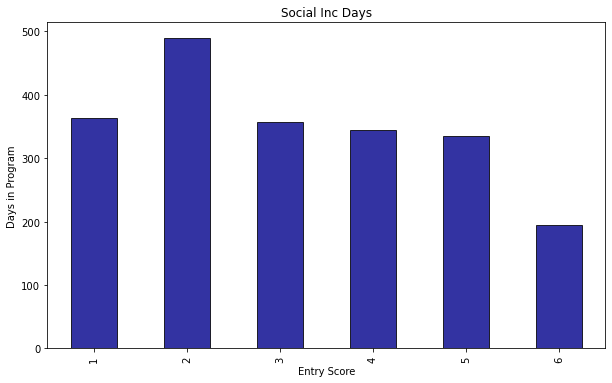

In [98]:
ssingraph = ssin.plot(figsize=(10,6),
                      x = 'entry_score',
                      y = 'time_in_program',
                      title = 'Social Inc Days',
                      xlabel = 'Entry Score',
                      ylabel = 'Days in Program',
                      kind = 'bar',
                      color = 'darkblue',
                      edgecolor = 'black',
                      alpha = 0.8)

ssingraph.get_legend ().remove ()

In [99]:
# knowledge inc days graph

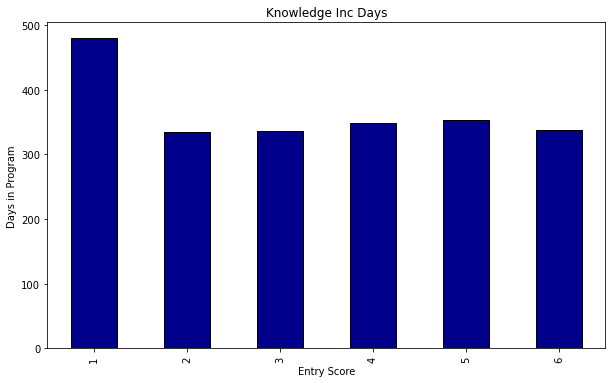

In [100]:
ksingraph = ksin.plot(figsize=(10,6),
                      x = 'entry_score',
                      y = 'time_in_program',
                      title = 'Knowledge Inc Days',
                      xlabel = 'Entry Score',
                      ylabel = 'Days in Program',
                      color = 'darkblue',
                      edgecolor = 'black',
                      kind = 'bar')

ksingraph.get_legend ().remove ()

In [101]:
# approp_action increase days graph

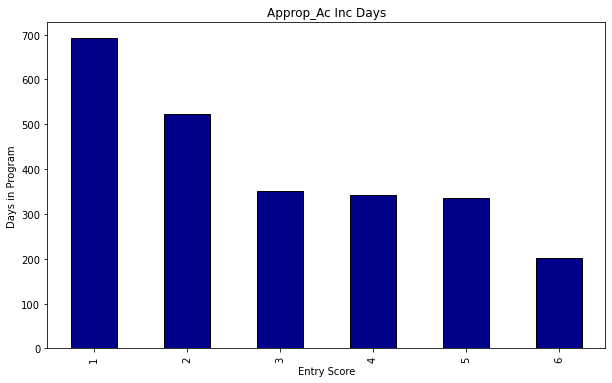

In [102]:
aasingraph = aasin.plot(figsize=(10,6),
                        x = 'entry_score',
                        y = 'time_in_program',
                        title = 'Approp_Ac Inc Days',
                        xlabel = 'Entry Score',
                        ylabel = 'Days in Program',
                        color = 'darkblue',
                        edgecolor = 'black',
                        kind = 'bar')

aasingraph.get_legend ().remove ()


In [103]:
#social increase % graph 

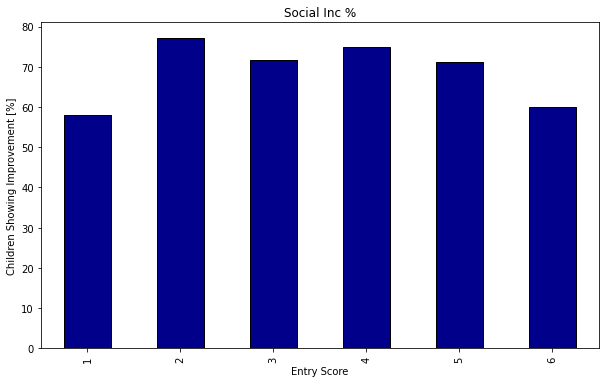

In [104]:
ssingrapha = ssin.plot(figsize=(10,6),
                      x = 'entry_score',
                      y = 'pct_of_children_improved',
                      title = 'Social Inc %',
                      xlabel = 'Entry Score',
                      ylabel = 'Children Showing Improvement [%]',
                      color = 'darkblue',
                      edgecolor = 'black',
                      kind = 'bar')

ssingrapha.get_legend ().remove ()

In [105]:
# knowledge increase % graph 

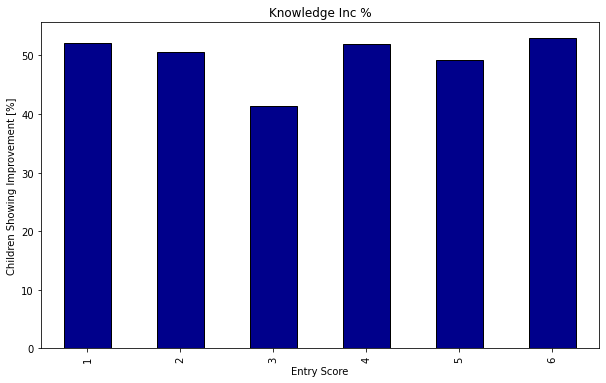

In [106]:
ksingrapha = ksin.plot(figsize=(10,6),
                      x = 'entry_score',
                      y = 'pct_of_children_improved',
                      title = 'Knowledge Inc %',
                      xlabel = 'Entry Score',
                      ylabel = 'Children Showing Improvement [%]',
                      color = 'darkblue',
                      edgecolor = 'black',
                      kind = 'bar')

ksingrapha.get_legend ().remove ()

In [107]:
# approp action & increase graph 

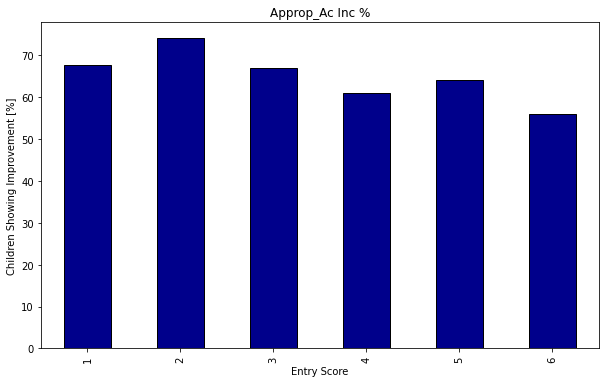

In [108]:
aasingrapha = aasin.plot(figsize=(10,6),
                      x = 'entry_score',
                      y = 'pct_of_children_improved',
                      title = 'Approp_Ac Inc %',
                      xlabel = 'Entry Score',
                      ylabel = 'Children Showing Improvement [%]',
                      color = 'darkblue',
                      edgecolor = 'black',
                      kind = 'bar')

aasingrapha.get_legend ().remove ()


In [109]:
# social no change days graph

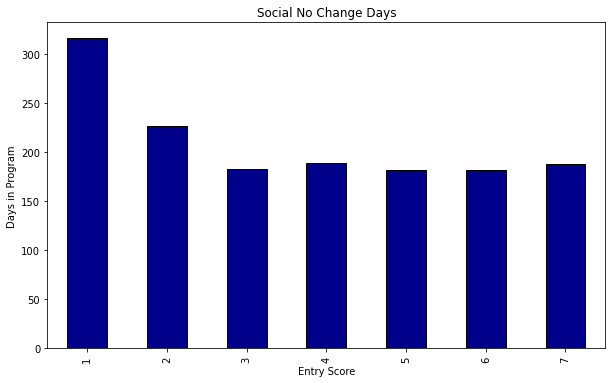

In [110]:
ssncgraph = ssnc.plot(figsize=(10,6),
                      x = 'entry_score',
                      y = 'time_in_program',
                      title = 'Social No Change Days',
                      xlabel = 'Entry Score',
                      ylabel = 'Days in Program',
                      color = 'darkblue',
                      edgecolor = 'black',
                      kind = 'bar',)

ssncgraph.get_legend ().remove ()

In [111]:
#knowledge no change days graph

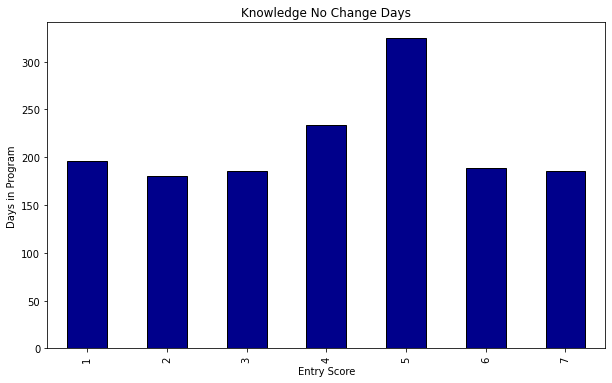

In [112]:
ksncgraph = ksnc.plot(figsize=(10,6),
                      x = 'entry_score',
                      y = 'time_in_program',
                      title = 'Knowledge No Change Days',
                      xlabel = 'Entry Score',
                      ylabel = 'Days in Program',
                      color = 'darkblue',
                      edgecolor = 'black',
                      kind = 'bar',)


ksncgraph.get_legend ().remove ()

In [113]:
#approp action no change days graph

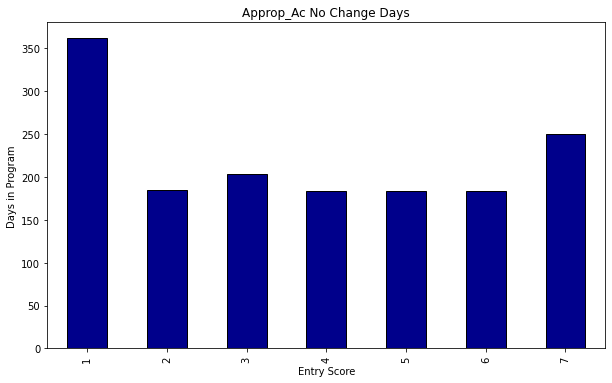

In [114]:
aasncgraph = aasnc.plot(figsize=(10,6),
                      x = 'entry_score',
                      y = 'time_in_program',
                      title = 'Approp_Ac No Change Days',
                      xlabel = 'Entry Score',
                      ylabel = 'Days in Program',
                      color = 'darkblue',
                      edgecolor = 'black',
                      kind = 'bar',)

aasncgraph.get_legend ().remove ()

In [115]:
# social no change % graph

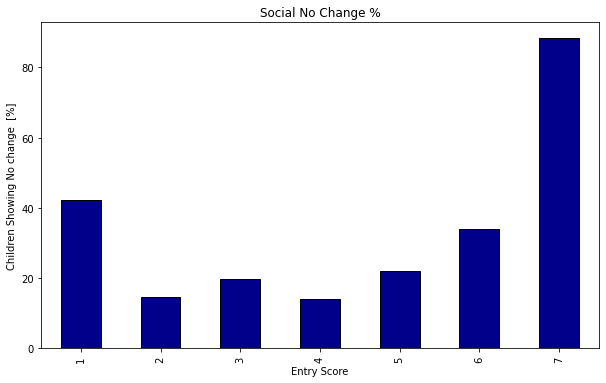

In [116]:
ssncgrapha = ssnc.plot(figsize=(10,6),
                      x = 'entry_score',
                      y = 'pct_of_children_nochange',
                      title = 'Social No Change %',
                      xlabel = 'Entry Score',
                      ylabel = 'Children Showing No change  [%]',
                      color = 'darkblue',
                      edgecolor = 'black',
                      kind = 'bar')

ssncgrapha.get_legend ().remove ()


In [117]:
# knowledge no change % graph 

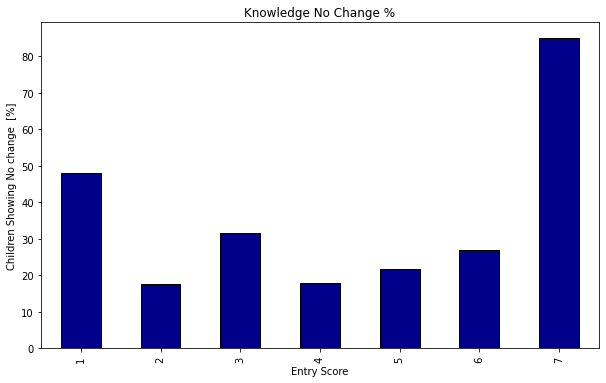

In [118]:
ksncgrapha = ksnc.plot(figsize=(10,6),
                      x = 'entry_score',
                      y = 'pct_of_children_nochange',
                      title = 'Knowledge No Change %',
                      xlabel = 'Entry Score',
                      ylabel = 'Children Showing No change  [%]',
                      color = 'darkblue',
                      edgecolor = 'black',
                      kind = 'bar')

ksncgrapha.get_legend ().remove ()

In [119]:
# approp action no days change graph

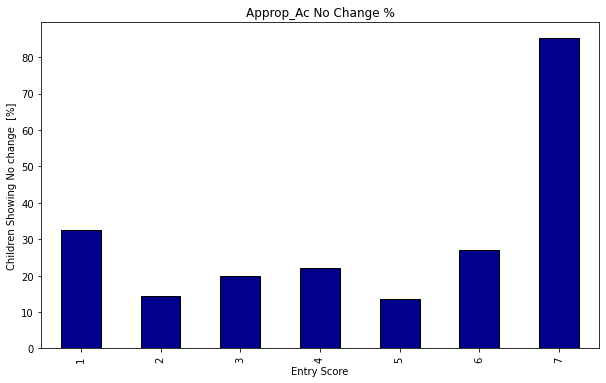

In [120]:
aasncgrapha = aasnc.plot(figsize=(10,6),
                      x = 'entry_score',
                      y = 'pct_of_children_nochange',
                      title = 'Approp_Ac No Change %',
                      xlabel = 'Entry Score',
                      ylabel = 'Children Showing No change  [%]',
                      color = 'darkblue',
                      edgecolor = 'black',
                      kind = 'bar')

aasncgrapha.get_legend ().remove ()

In [121]:
# social decrease days graph

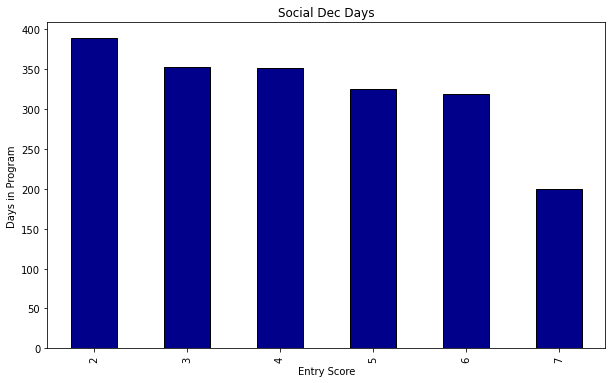

In [122]:
ssdegraph = ssde.plot(figsize=(10,6),
                      x = 'entry_score',
                      y = 'time_in_program',
                      title = 'Social Dec Days',
                      xlabel = 'Entry Score',
                      ylabel = 'Days in Program',
                      color = 'darkblue',
                      edgecolor = 'black',
                      kind = 'bar',)

ssdegraph.get_legend ().remove ()

In [123]:
#knowledge decrease days graph 

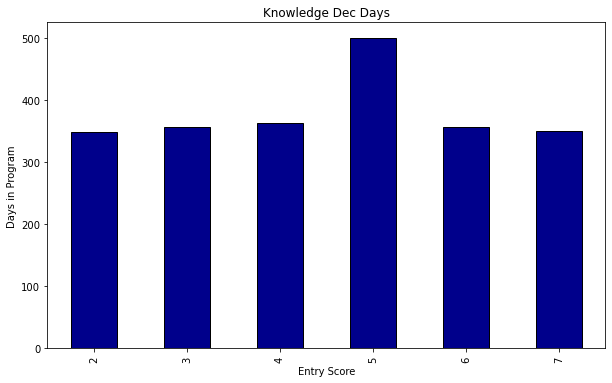

In [124]:
ksdegraph = ksde.plot(figsize=(10,6),
                      x = 'entry_score',
                      y = 'time_in_program',
                      title = 'Knowledge Dec Days',
                      xlabel = 'Entry Score',
                      ylabel = 'Days in Program',
                      color = 'darkblue',
                      edgecolor = 'black',
                      kind = 'bar',)

ksdegraph.get_legend ().remove ()

In [125]:
#approp action decrease days graph

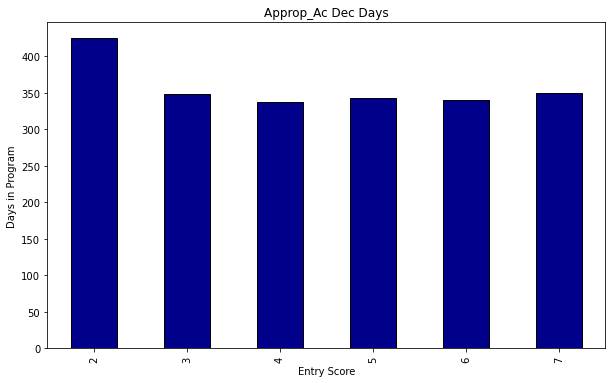

In [126]:
aasdegraph = aasde.plot(figsize=(10,6),
                      x = 'entry_score',
                      y = 'time_in_program',
                      title = 'Approp_Ac Dec Days',
                      xlabel = 'Entry Score',
                      ylabel = 'Days in Program',
                      color = 'darkblue',
                      edgecolor = 'black',
                      kind = 'bar',)

aasdegraph.get_legend ().remove ()

In [127]:
#social decrease % graph 

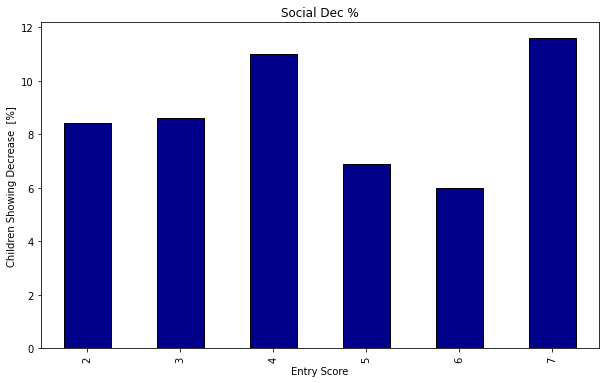

In [128]:
ssdegrapha = ssde.plot(figsize=(10,6),
                      x = 'entry_score',
                      y = 'pct_of_children_decrease',
                      title = 'Social Dec %',
                      xlabel = 'Entry Score',
                      ylabel = 'Children Showing Decrease  [%]',
                      color = 'darkblue',
                      edgecolor = 'black',
                      kind = 'bar')

ssdegrapha.get_legend ().remove ()

In [129]:
#knowledge decrease % graph

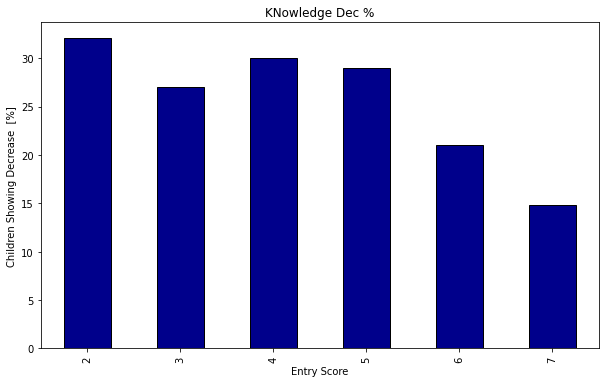

In [130]:
ksdegrapha = ksde.plot(figsize=(10,6),
                      x = 'entry_score',
                      y = 'pct_of_children_decrease',
                      title = 'KNowledge Dec %',
                      xlabel = 'Entry Score',
                      ylabel = 'Children Showing Decrease  [%]',
                      color = 'darkblue',
                      edgecolor = 'black',
                      kind = 'bar')

ksdegrapha.get_legend ().remove ()

In [131]:
# approp_action decrease % graph  

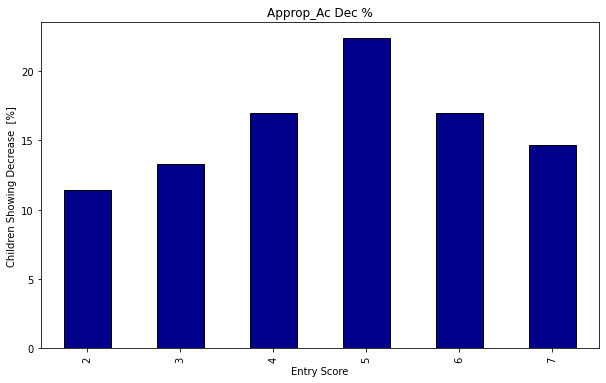

In [132]:
aasdegrapha = aasde.plot(figsize=(10,6),
                      x = 'entry_score',
                      y = 'pct_of_children_decrease',
                      title = 'Approp_Ac Dec %',
                      xlabel = 'Entry Score',
                      ylabel = 'Children Showing Decrease  [%]',
                      color = 'darkblue',
                      edgecolor = 'black',
                      kind = 'bar')

aasdegrapha.get_legend ().remove ()

In [133]:
# pie chart social %

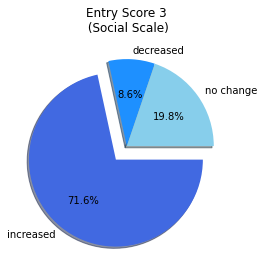

In [134]:
values = [71.600965,8.608206,19.790829]
colors = ['royalblue', 'dodgerblue', 'skyblue']
labels = ['increased','decreased','no change']
explode = (0.2, 0, 0)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Entry Score 3\n (Social Scale)')
plt.show()

In [135]:
# pie chart knowledge %

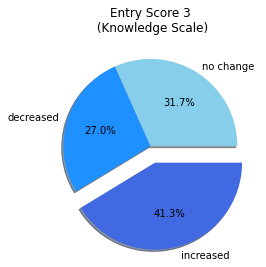

In [136]:
values = [41.302739,27.017024,31.680237]
colors = ['royalblue', 'dodgerblue', 'skyblue']
labels = ['increased','decreased','no change']
explode = (0.2, 0, 0)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Entry Score 3\n (Knowledge Scale)')
plt.show()

In [137]:
# pie chart Approp_Ac %

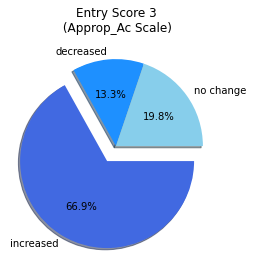

In [138]:
values = [66.907514,13.294798,19.797688]
colors = ['royalblue', 'dodgerblue', 'skyblue']
labels = ['increased','decreased','no change']
explode = (0.2, 0, 0)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Entry Score 3\n (Approp_Ac Scale)')
plt.show()

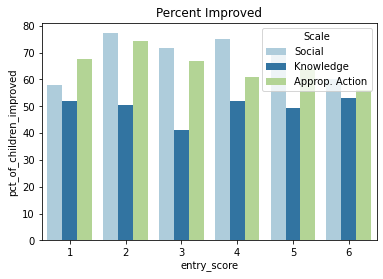

In [139]:
ssin['Scale']='Social'
ksin['Scale']='Knowledge'
aasin['Scale']='Approp. Action'
res=pd.concat([ssin,ksin,aasin])
sns.barplot(x='entry_score',y=('pct_of_children_improved'),data=res,hue='Scale',palette='Paired').set(title='Percent Improved')
plt.show()

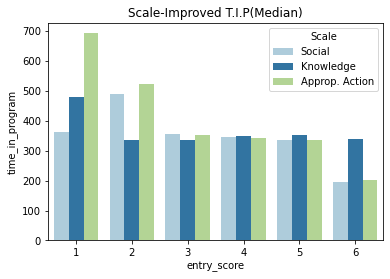

In [140]:
ssin['Scale']='Social'
ksin['Scale']='Knowledge'
aasin['Scale']='Approp. Action'
res=pd.concat([ssin,ksin,aasin])
sns.barplot(x='entry_score',y=('time_in_program'),data=res,hue='Scale',palette='Paired').set(title='Scale-Improved T.I.P(Median)')
plt.show()

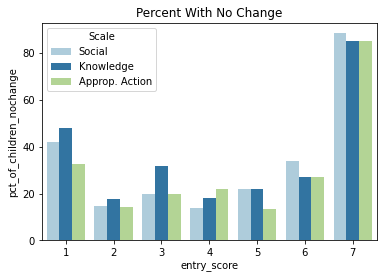

In [141]:
ssnc['Scale']='Social'
ksnc['Scale']='Knowledge'
aasnc['Scale']='Approp. Action'
res=pd.concat([ssnc,ksnc,aasnc])
sns.barplot(x='entry_score',y=('pct_of_children_nochange'),data=res,hue='Scale',palette='Paired').set(title='Percent With No Change')
plt.show()

In [142]:
#chart comparing children that did not improve with children that did improve and children that regressed

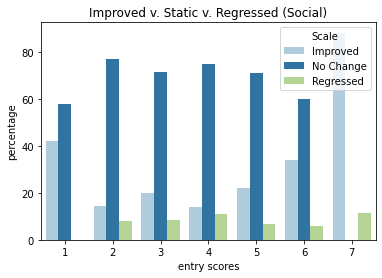

In [143]:
df1=pd.DataFrame({'x':[1,2,3,4,5,6,7],'y':[42.1, 14.5, 19.8, 14.0, 21.9, 34.0, 88.4]})
df2=pd.DataFrame({'x':[1,2,3,4,5,6,7],'y':[57.9, 77.2, 71.6, 75.0, 71.14, 60.0, 0]})
df3=pd.DataFrame({'x':[1,2,3,4,5,6,7],'y':[0 , 8.2, 8.6, 11.0, 6.9, 6.0, 11.6]})
df1['Scale']='Improved'
df2['Scale']='No Change'
df3['Scale']='Regressed'
res=pd.concat([df1,df2, df3])
sns.barplot(x='x',y='y',data=res,hue='Scale', palette='Paired')
plt.xlabel('entry scores')
plt.ylabel('percentage')
plt.title('Improved v. Static v. Regressed (Social)')
plt.show()

In [ ]:
#eco exit social for 1 with increase 2,3,4...

In [146]:
eco_exit_for_1_social = eco_exit[eco_exit['ent_social'] == 1.0]
eco_exit_for_1_social

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
15,ET,473712.0,2020-05-20,1.0,5.0,1.0,2021-12-10,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,680.0,569.0,0.0
36,ET,475788.0,2020-02-05,1.0,5.0,6.0,2021-07-19,2.0,1.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,578.0,530.0,0.0
40,ET,486469.0,2020-08-21,1.0,2.0,5.0,2021-08-17,3.0,1.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,419.0,361.0,0.0
49,ET,506116.0,2021-07-07,1.0,1.0,2.0,2021-12-13,2.0,1.0,2.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,333.0,159.0,0.0
50,ET,449508.0,2018-12-18,1.0,3.0,1.0,2021-05-05,2.0,2.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1024.0,869.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8609,UC,474727.0,2020-11-04,1.0,4.0,4.0,2021-04-29,3.0,5.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,348.0,176.0,0.0
8611,UC,469594.0,2019-10-16,1.0,4.0,1.0,2021-09-08,3.0,1.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,779.0,693.0,0.0
8622,UC,482444.0,2020-06-19,1.0,3.0,5.0,2021-05-13,1.0,1.0,2.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,482.0,328.0,0.0
8626,UC,483729.0,2020-08-25,1.0,3.0,2.0,2021-08-12,6.0,6.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,416.0,352.0,0.0


In [147]:
eco_exit_for_1_social_2 = eco_exit_for_1_social[eco_exit_for_1_social['exit_social'] ==2]
eco_exit_for_1_social_2

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
36,ET,475788.0,2020-02-05,1.0,5.0,6.0,2021-07-19,2.0,1.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,578.0,530.0,0.0
49,ET,506116.0,2021-07-07,1.0,1.0,2.0,2021-12-13,2.0,1.0,2.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,333.0,159.0,0.0
50,ET,449508.0,2018-12-18,1.0,3.0,1.0,2021-05-05,2.0,2.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1024.0,869.0,0.0
54,ET,477970.0,2020-09-24,1.0,3.0,4.0,2021-08-24,2.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,601.0,526.0,192.0
61,ET,486813.0,2020-08-27,1.0,3.0,5.0,2022-02-01,2.0,2.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,609.0,523.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8353,UC,494375.0,2021-03-11,1.0,1.0,1.0,2021-09-02,2.0,1.0,2.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,271.0,175.0,0.0
8458,UC,497623.0,2021-03-02,1.0,4.0,1.0,2022-02-09,2.0,4.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,396.0,344.0,0.0
8542,UC,450488.0,2019-01-14,1.0,3.0,1.0,2019-06-24,2.0,3.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,916.0,161.0,0.0
8543,UC,450487.0,2019-01-14,1.0,3.0,1.0,2019-06-24,2.0,5.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,916.0,161.0,0.0


In [148]:
eco_exit_for_1_social_3 = eco_exit_for_1_social[eco_exit_for_1_social['exit_social'] ==3]
eco_exit_for_1_social_3

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
40,ET,486469.0,2020-08-21,1.0,2.0,5.0,2021-08-17,3.0,1.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,419.0,361.0,0.0
51,ET,484314.0,2020-07-01,1.0,3.0,4.0,2021-11-22,3.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,617.0,509.0,0.0
121,ET,488076.0,2020-09-14,1.0,3.0,2.0,2021-09-01,3.0,3.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,451.0,352.0,0.0
149,ET,495574.0,2021-02-04,1.0,3.0,6.0,2022-02-02,3.0,1.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,470.0,363.0,0.0
171,ET,479734.0,2020-05-13,1.0,2.0,3.0,2021-05-03,3.0,1.0,2.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,418.0,355.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8214,UC,455704.0,2019-02-27,1.0,1.0,2.0,2021-07-12,3.0,1.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1012.0,866.0,0.0
8318,UC,485980.0,2020-09-03,1.0,3.0,4.0,2021-08-27,3.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,380.0,358.0,0.0
8478,UC,482634.0,2020-06-17,1.0,4.0,3.0,2021-12-06,3.0,5.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,710.0,537.0,0.0
8609,UC,474727.0,2020-11-04,1.0,4.0,4.0,2021-04-29,3.0,5.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,348.0,176.0,0.0


In [149]:
eco_exit_for_1_social_4 = eco_exit_for_1_social[eco_exit_for_1_social['exit_social'] ==4]
eco_exit_for_1_social_4

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
365,ET,456574.0,2019-12-12,1.0,4.0,1.0,2021-05-12,4.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,680.0,517.0,0.0
506,ET,479807.0,2020-06-19,1.0,4.0,4.0,2021-11-18,4.0,2.0,3.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,716.0,517.0,0.0
520,ET,499056.0,2021-03-24,1.0,1.0,4.0,2021-11-02,4.0,1.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,226.0,223.0,0.0
1278,ET,451825.0,2019-02-07,1.0,2.0,1.0,2021-03-16,4.0,1.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,900.0,768.0,0.0
1714,FT,477200.0,2020-02-19,1.0,4.0,3.0,2022-01-25,4.0,1.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,736.0,706.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8055,UC,467057.0,2019-08-27,1.0,1.0,1.0,2022-01-19,4.0,1.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,914.0,876.0,0.0
8333,UC,455181.0,2019-02-28,1.0,3.0,1.0,2020-08-10,4.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,981.0,529.0,0.0
8435,UC,492859.0,2021-01-28,1.0,3.0,4.0,2021-12-06,4.0,3.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,472.0,353.0,41.0
8481,UC,472064.0,2019-02-06,1.0,3.0,2.0,2021-05-26,4.0,4.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,608.0,546.0,-294.0


In [150]:
eco_exit_for_1_social_5 = eco_exit_for_1_social[eco_exit_for_1_social['exit_social'] == 5]
eco_exit_for_1_social_5

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
175,ET,498716.0,2021-05-24,1.0,3.0,3.0,2021-09-28,5.0,5.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,198.0,182.0,55.0
405,ET,471687.0,2020-07-13,1.0,4.0,2.0,2021-08-31,5.0,3.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,638.0,546.0,132.0
474,ET,496022.0,2021-02-10,1.0,3.0,4.0,2022-01-28,5.0,6.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,487.0,352.0,0.0
523,ET,498084.0,2021-03-11,1.0,3.0,1.0,2021-09-16,5.0,2.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,281.0,189.0,0.0
739,ET,449168.0,2018-12-18,1.0,2.0,1.0,2021-06-07,5.0,3.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,950.0,902.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,UC,473677.0,2020-01-02,1.0,3.0,1.0,2021-12-16,5.0,6.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,865.0,714.0,0.0
8442,UC,459105.0,2019-04-23,1.0,1.0,2.0,2021-10-22,5.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1050.0,913.0,0.0
8454,UC,452126.0,2019-01-24,1.0,2.0,1.0,2021-06-15,5.0,3.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,906.0,873.0,0.0
8504,UC,508761.0,2021-09-08,1.0,2.0,6.0,2022-02-08,5.0,3.0,6.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,284.0,153.0,0.0


In [151]:
eco_exit_for_1_social_6 = eco_exit_for_1_social[eco_exit_for_1_social['exit_social'] == 6]
eco_exit_for_1_social_6

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
75,ET,461642.0,2019-05-28,1.0,4.0,1.0,2021-04-22,6.0,6.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,793.0,695.0,0.0
297,ET,464483.0,2019-07-29,1.0,4.0,1.0,2021-08-11,6.0,5.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,802.0,751.0,7.0
371,ET,466966.0,2019-10-07,1.0,5.0,2.0,2021-03-18,6.0,5.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,687.0,528.0,0.0
556,ET,505599.0,2021-07-19,1.0,3.0,4.0,2022-01-18,6.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,316.0,183.0,0.0
705,ET,462468.0,2019-12-17,1.0,3.0,1.0,2021-10-19,6.0,2.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,808.0,699.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8367,UC,478138.0,2020-03-02,1.0,4.0,6.0,2021-02-22,6.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,486.0,357.0,0.0
8406,UC,496596.0,2021-02-16,1.0,3.0,4.0,2022-02-07,6.0,6.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,460.0,356.0,0.0
8433,UC,466289.0,2019-09-13,1.0,1.0,2.0,2022-01-25,6.0,3.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1049.0,900.0,35.0
8459,UC,502500.0,2021-07-23,1.0,1.0,1.0,2021-11-30,6.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,274.0,186.0,56.0


In [161]:
eco_exit_for_1_social_7 = eco_exit_for_1_social[eco_exit_for_1_social['exit_social'] == 7]
eco_exit_for_1_social_7

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
15,ET,473712.0,2020-05-20,1.0,5.0,1.0,2021-12-10,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,680.0,569.0,0.0
214,ET,502685.0,2021-06-04,1.0,4.0,1.0,2022-05-02,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,332.0,332.0,0.0
265,ET,491482.0,2020-11-20,1.0,3.0,5.0,2022-04-27,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,551.0,523.0,0.0
349,ET,457868.0,2019-06-25,1.0,5.0,1.0,2021-11-05,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,892.0,864.0,0.0
451,ET,488583.0,2020-09-21,1.0,4.0,4.0,2021-09-08,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,493.0,352.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8162,UC,482072.0,2020-05-13,1.0,1.0,1.0,2021-04-16,7.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,459.0,338.0,0.0
8237,UC,448851.0,2018-11-27,1.0,1.0,1.0,2021-04-07,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1017.0,862.0,0.0
8288,UC,457230.0,2019-03-26,1.0,1.0,1.0,2021-10-07,7.0,5.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,926.0,926.0,0.0
8511,UC,484589.0,2020-07-29,1.0,7.0,4.0,2022-01-12,7.0,6.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,668.0,532.0,0.0


In [ ]:
#social days scount 1,2,3...

In [153]:
social_1_2= (eco_exit_for_1_social_2['exit_social']).count()
print(social_1_2)

179


In [154]:
social_1_3= (eco_exit_for_1_social_3['exit_social']).count()
print(social_1_3)

174


In [155]:
social_1_4= (eco_exit_for_1_social_4['exit_social']).count()
print(social_1_4)

75


In [156]:
social_1_5= (eco_exit_for_1_social_5['exit_social']).count()
print(social_1_5)

98


In [157]:
social_1_6= (eco_exit_for_1_social_6['exit_social']).count()
print(social_1_6)

106


In [162]:
social_1_7= (eco_exit_for_1_social_7['exit_social']).count()
print(social_1_7)

114


In [ ]:
#knowledge days count 1,2,3...

In [210]:
knowledge_2= (knowledge_1_2['exit_knowledge']).count()
print(knowledge_2)

67


In [211]:
knowledge_3= (knowledge_1_3['exit_knowledge']).count()
print(knowledge_3)

125


In [212]:
knowledge_4= (knowledge_1_4['exit_knowledge']).count()
print(knowledge_4)

70


In [213]:
knowledge_5= (knowledge_1_5['exit_knowledge']).count()
print(knowledge_5)

86


In [214]:
knowledge_6= (knowledge_1_6['exit_knowledge']).count()
print(knowledge_6)

48


In [215]:
knowledge_7= (knowledge_1_7['exit_knowledge']).count()
print(knowledge_7)

90


In [ ]:
#approp_action days count 1,2,3...

In [220]:
approp_2= (approp_1_2['exit_approp_action']).count()
print(knowledge_2)

67


In [221]:
approp_3= (approp_1_3['exit_approp_action']).count()
print(knowledge_3)

125


In [222]:
approp_4= (approp_1_4['exit_approp_action']).count()
print(knowledge_4)

70


In [223]:
approp_5= (approp_1_5['exit_approp_action']).count()
print(knowledge_5)

86


In [224]:
approp_6= (approp_1_6['exit_approp_action']).count()
print(knowledge_6)

48


In [225]:
approp_7= (approp_1_7['exit_approp_action']).count()
print(knowledge_7)

90


In [ ]:
#chart social 1 to 

In [167]:
#list entry 1 social days

In [238]:
lst3 = [social_1_2, social_1_3, social_1_4, social_1_5, social_1_6, social_1_7]
df3= pd.DataFrame(lst3, index=['Social: 2', 'Social: 3', 'Social: 4', 'Social: 5', 'Social: 6', 'Social: 7'])
print(df3)

             0
Social: 2  179
Social: 3  174
Social: 4   75
Social: 5   98
Social: 6  106
Social: 7  114


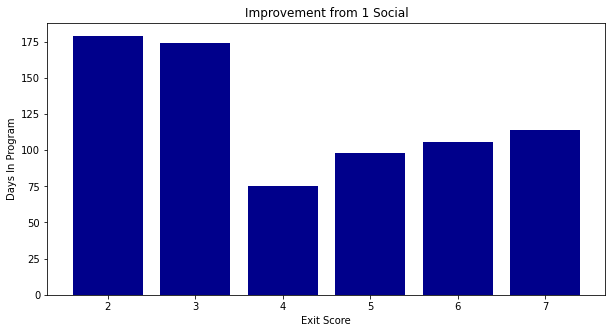

In [257]:
#improvement from 1 social
social = {'2': 179, '3': 174, '4': 75, '5': 98, '6': 106, '7': 114}

Exit_Score = list(social.keys())
Days = list(social.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(Exit_Score, Days, color = 'darkblue')

plt.xlabel('Exit Score')
plt.ylabel('Days In Program')
plt.title('Improvement from 1 Social')
plt.show()

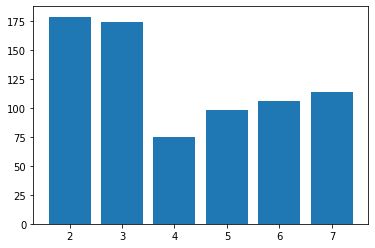

In [245]:
lst3 = [social_1_2, social_1_3, social_1_4, social_1_5, social_1_6, social_1_7]
df3= pd.DataFrame(lst3, index=['Social: 2', 'Social: 3', 'Social: 4', 'Social: 5', 'Social: 6', 'Social: 7'])
lst3_2 = [2,3,4,5,6,7]
plt.bar(lst3_2, lst3)
plt.show()

In [227]:
lst4 = [knowledge_2, knowledge_3, knowledge_4, knowledge_5, knowledge_6, knowledge_7]
dfknow= pd.DataFrame(lst4, index=['Knowledge: 2', 'Knowledge: 3', 'Knowledge: 4', 'Knowledge: 5', 'Knowledge: 6', 'Knowledge: 7'])
print(dfknow)

                0
Knowledge: 2   67
Knowledge: 3  125
Knowledge: 4   70
Knowledge: 5   86
Knowledge: 6   48
Knowledge: 7   90


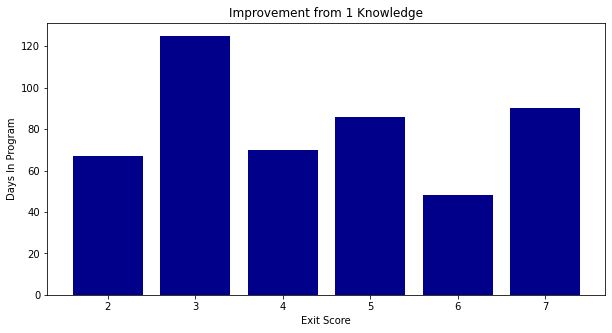

In [256]:
#improvement from 1 knowledge
knowledge = {'2': 67, '3': 125, '4': 70, '5': 86, '6': 48, '7': 90}

Exit_Score = list(knowledge.keys())
Days = list(knowledge.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(Exit_Score, Days, color = 'darkblue')

plt.xlabel('Exit Score')
plt.ylabel('Days In Program')
plt.title('Improvement from 1 Knowledge')
plt.show()

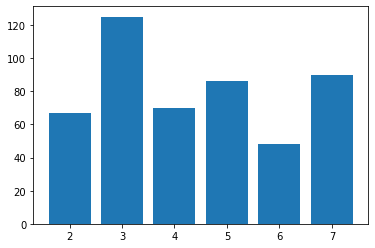

In [242]:
lst4 = [knowledge_2, knowledge_3, knowledge_4, knowledge_5, knowledge_6, knowledge_7]
dfknow= pd.DataFrame(lst4, index=['Knowledge: 2', 'Knowledge: 3', 'Knowledge: 4', 'Knowledge: 5', 'Knowledge: 6', 'Knowledge: 7'])
lst3_2 = [2,3,4,5,6,7]
plt.bar(lst3_2, lst4)
plt.show()

In [226]:
lst5 = [approp_2, approp_3, approp_4, approp_5, approp_6, approp_7]
dfapprop= pd.DataFrame(lst5, index=['Aprrop_Action: 2', 'Approp_Action: 3', 'Approp_Action: 4', 'Approp_Action: 5', 'Approp_Action: 6', 'Approp_Action: 7'])
print(dfapprop)

                    0
Aprrop_Action: 2   83
Approp_Action: 3   93
Approp_Action: 4   99
Approp_Action: 5   57
Approp_Action: 6   84
Approp_Action: 7  272


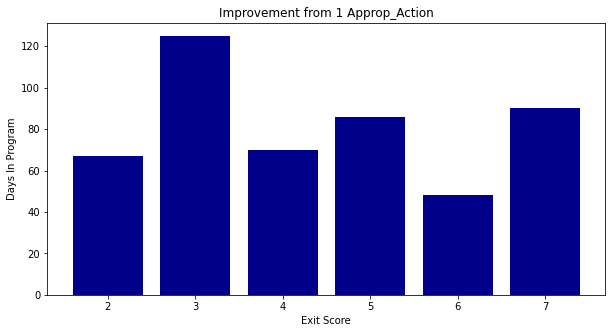

In [255]:
#improvement from 1 approp
approp_action = {'2': 67, '3': 125, '4': 70, '5': 86, '6': 48, '7': 90}

Exit_Score = list(approp_action.keys())
Days = list(approp_action.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(Exit_Score, Days, color = 'darkblue')

plt.xlabel('Exit Score')
plt.ylabel('Days In Program')
plt.title('Improvement from 1 Approp_Action')
plt.show()

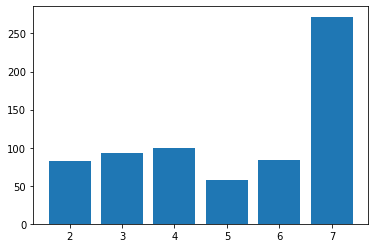

In [241]:
lst5 = [approp_2, approp_3, approp_4, approp_5, approp_6, approp_7]
dfapprop= pd.DataFrame(lst5, index=['Aprrop_Action: 2', 'Approp_Action: 3', 'Approp_Action: 4', 'Approp_Action: 5', 'Approp_Action: 6', 'Approp_Action: 7'])
lst3_2 = [2,3,4,5,6,7]
plt.bar(lst3_2, lst5)
plt.show()

In [199]:
#1 to 2,3,4...

In [169]:
eco_exit_for_1_knowledge = eco_exit[eco_exit['ent_knowledge'] == 1.0]
eco_exit_for_1_knowledge

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
9,ET,489949.0,2020-10-20,2.0,1.0,2.0,2021-09-30,1.0,4.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,533.0,345.0,0.0
17,ET,500498.0,2021-04-16,2.0,1.0,2.0,2021-10-14,2.0,1.0,2.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,183.0,181.0,0.0
49,ET,506116.0,2021-07-07,1.0,1.0,2.0,2021-12-13,2.0,1.0,2.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,333.0,159.0,0.0
55,ET,472165.0,2019-12-06,2.0,1.0,3.0,2022-04-29,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,875.0,875.0,0.0
59,ET,509440.0,2021-09-16,1.0,1.0,4.0,2022-02-17,1.0,1.0,3.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,192.0,154.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8512,UC,492361.0,2020-12-11,3.0,1.0,1.0,2021-06-03,2.0,2.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,286.0,174.0,0.0
8566,UC,456548.0,2019-03-21,2.0,1.0,2.0,2021-08-16,4.0,2.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1058.0,879.0,0.0
8567,UC,462401.0,2019-06-13,1.0,1.0,1.0,2021-06-01,1.0,2.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,799.0,719.0,0.0
8607,UC,472442.0,2019-12-04,2.0,1.0,1.0,2021-07-28,6.0,6.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,652.0,602.0,0.0


In [192]:
knowledge_1_2 = eco_exit_for_1_knowledge[eco_exit_for_1_knowledge['exit_knowledge'] ==2]
knowledge_1_2

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
119,ET,496592.0,2021-03-22,1.0,1.0,3.0,2021-08-23,2.0,2.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,244.0,182.0,28.0
248,ET,497230.0,2021-03-02,3.0,1.0,4.0,2021-08-18,4.0,2.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,277.0,169.0,0.0
743,ET,499943.0,2021-04-19,3.0,1.0,6.0,2021-10-07,4.0,2.0,6.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,273.0,171.0,0.0
749,ET,488829.0,2020-12-04,2.0,1.0,2.0,2021-03-19,4.0,2.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,308.0,168.0,63.0
771,ET,488267.0,2020-09-10,6.0,1.0,3.0,2021-08-25,6.0,2.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,589.0,349.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7760,SW,488890.0,2021-08-04,1.0,1.0,2.0,2021-12-15,1.0,2.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,277.0,133.0,0.0
8315,UC,508426.0,2021-09-03,1.0,1.0,3.0,2022-02-24,2.0,2.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,247.0,174.0,0.0
8512,UC,492361.0,2020-12-11,3.0,1.0,1.0,2021-06-03,2.0,2.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,286.0,174.0,0.0
8566,UC,456548.0,2019-03-21,2.0,1.0,2.0,2021-08-16,4.0,2.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1058.0,879.0,0.0


In [193]:
knowledge_1_3 = eco_exit_for_1_knowledge[eco_exit_for_1_knowledge['exit_knowledge'] ==3]
knowledge_1_3

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
89,ET,456325.0,2019-03-21,2.0,1.0,2.0,2021-09-09,6.0,3.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,917.0,917.0,14.0
182,ET,494501.0,2021-02-18,4.0,1.0,3.0,2021-06-17,7.0,3.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,262.0,141.0,22.0
186,ET,498145.0,2021-03-10,5.0,1.0,2.0,2022-02-16,3.0,3.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,474.0,343.0,0.0
473,ET,492442.0,2020-12-01,3.0,1.0,2.0,2021-06-23,5.0,3.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,266.0,204.0,0.0
628,ET,467910.0,2019-09-13,4.0,1.0,3.0,2021-08-24,7.0,3.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,760.0,711.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8433,UC,466289.0,2019-09-13,1.0,1.0,2.0,2022-01-25,6.0,3.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1049.0,900.0,35.0
8465,UC,510879.0,2021-10-13,4.0,1.0,4.0,2022-04-01,6.0,3.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,194.0,170.0,0.0
8466,UC,464127.0,2019-07-24,4.0,1.0,2.0,2021-06-23,2.0,3.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1045.0,728.0,28.0
8483,UC,491937.0,2020-11-05,1.0,1.0,1.0,2021-10-20,1.0,3.0,2.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,419.0,349.0,0.0


In [194]:
knowledge_1_4 = eco_exit_for_1_knowledge[eco_exit_for_1_knowledge['exit_knowledge'] ==4]
knowledge_1_4

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
9,ET,489949.0,2020-10-20,2.0,1.0,2.0,2021-09-30,1.0,4.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,533.0,345.0,0.0
845,ET,494059.0,2021-01-13,2.0,1.0,2.0,2022-02-04,2.0,4.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,474.0,387.0,0.0
1140,ET,463187.0,2019-06-28,2.0,1.0,2.0,2021-06-24,6.0,4.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1051.0,727.0,0.0
1256,ET,482345.0,2020-06-02,2.0,1.0,1.0,2021-05-21,3.0,4.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,427.0,353.0,0.0
1417,ET,509642.0,2021-11-01,3.0,1.0,5.0,2022-04-07,6.0,4.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,254.0,176.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8052,UC,493807.0,2020-12-16,1.0,1.0,1.0,2021-12-09,1.0,4.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,448.0,358.0,0.0
8057,UC,452772.0,2019-02-15,2.0,1.0,1.0,2021-01-28,7.0,4.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,886.0,713.0,0.0
8074,UC,459879.0,2019-06-26,1.0,1.0,1.0,2020-06-23,2.0,4.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,887.0,363.0,0.0
8239,UC,467921.0,2019-09-05,2.0,1.0,1.0,2022-04-12,7.0,4.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,984.0,950.0,0.0


In [195]:
knowledge_1_5 = eco_exit_for_1_knowledge[eco_exit_for_1_knowledge['exit_knowledge'] ==5]
knowledge_1_5

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
342,ET,504562.0,2021-06-29,3.0,1.0,2.0,2021-12-14,3.0,5.0,2.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,317.0,168.0,0.0
394,ET,465380.0,2019-08-22,2.0,1.0,1.0,2022-01-24,6.0,5.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,963.0,903.0,17.0
512,ET,506100.0,2021-08-03,3.0,1.0,2.0,2022-01-18,2.0,5.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,303.0,168.0,0.0
607,ET,453609.0,2019-01-31,2.0,1.0,2.0,2021-05-11,7.0,5.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1035.0,831.0,0.0
880,ET,486365.0,2020-09-15,2.0,1.0,2.0,2021-08-04,3.0,5.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,665.0,343.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8197,UC,475998.0,2020-01-29,1.0,1.0,1.0,2021-07-08,1.0,5.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,687.0,526.0,0.0
8288,UC,457230.0,2019-03-26,1.0,1.0,1.0,2021-10-07,7.0,5.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,926.0,926.0,0.0
8295,UC,452292.0,2019-02-07,3.0,1.0,2.0,2021-07-12,7.0,5.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1046.0,886.0,0.0
8355,UC,475329.0,2020-01-15,3.0,1.0,1.0,2020-07-15,4.0,5.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,868.0,182.0,0.0


In [196]:
knowledge_1_6 = eco_exit_for_1_knowledge[eco_exit_for_1_knowledge['exit_knowledge'] ==6]
knowledge_1_6

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
162,ET,452244.0,2019-02-08,2.0,1.0,2.0,2021-07-02,5.0,6.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1021.0,875.0,0.0
524,ET,483597.0,2020-07-09,2.0,1.0,2.0,2021-12-20,7.0,6.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,687.0,529.0,0.0
526,ET,483600.0,2020-07-09,3.0,1.0,2.0,2021-12-20,6.0,6.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,687.0,529.0,0.0
577,ET,486470.0,2020-08-18,3.0,1.0,2.0,2021-02-25,5.0,6.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,359.0,191.0,0.0
679,ET,461614.0,2019-05-31,3.0,1.0,2.0,2021-09-17,6.0,6.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1043.0,840.0,0.0
708,ET,495820.0,2021-02-17,2.0,1.0,2.0,2022-02-09,7.0,6.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,498.0,357.0,0.0
724,ET,457852.0,2019-04-09,3.0,1.0,1.0,2021-11-09,6.0,6.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1011.0,945.0,0.0
763,ET,446805.0,2018-11-13,2.0,1.0,2.0,2021-04-14,7.0,6.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1033.0,883.0,0.0
916,ET,504458.0,2021-07-09,3.0,1.0,2.0,2022-01-10,2.0,6.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,232.0,185.0,0.0
1079,ET,496293.0,2021-02-24,2.0,1.0,2.0,2021-10-27,2.0,6.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,369.0,245.0,0.0


In [197]:
knowledge_1_7 = eco_exit_for_1_knowledge[eco_exit_for_1_knowledge['exit_knowledge'] ==7]
knowledge_1_7

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
55,ET,472165.0,2019-12-06,2.0,1.0,3.0,2022-04-29,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,875.0,875.0,0.0
68,ET,465079.0,2019-06-07,3.0,1.0,3.0,2021-12-20,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1028.0,860.0,-67.0
147,ET,472520.0,2020-04-01,2.0,1.0,1.0,2022-04-11,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,907.0,859.0,119.0
525,ET,481631.0,2020-06-05,4.0,1.0,3.0,2021-11-15,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,717.0,528.0,0.0
627,ET,467754.0,2019-10-12,4.0,1.0,3.0,2022-02-28,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,990.0,899.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8407,UC,473243.0,2020-01-14,2.0,1.0,1.0,2021-11-18,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,867.0,709.0,35.0
8425,UC,448754.0,2019-01-02,5.0,1.0,1.0,2020-12-16,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,960.0,714.0,0.0
8442,UC,459105.0,2019-04-23,1.0,1.0,2.0,2021-10-22,5.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1050.0,913.0,0.0
8459,UC,502500.0,2021-07-23,1.0,1.0,1.0,2021-11-30,6.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,274.0,186.0,56.0


In [217]:
lst4 = [knowledge_2, knowledge_3, knowledge_4, knowledge_5, knowledge_6, knowledge_7]
dfknow= pd.DataFrame(lst4, index=['2', '3', '4', '5', '6', '7'])
print(dfknow)

     0
2   67
3  125
4   70
5   86
6   48
7   90


In [200]:
# approp 1 to 2,3,4...

In [201]:
eco_exit_for_1_approp = eco_exit[eco_exit['ent_approp_action'] == 1.0]
eco_exit_for_1_approp

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
15,ET,473712.0,2020-05-20,1.0,5.0,1.0,2021-12-10,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,680.0,569.0,0.0
50,ET,449508.0,2018-12-18,1.0,3.0,1.0,2021-05-05,2.0,2.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1024.0,869.0,0.0
62,ET,445787.0,2018-11-02,2.0,5.0,1.0,2021-02-25,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,981.0,846.0,0.0
67,ET,459388.0,2019-04-26,1.0,4.0,1.0,2021-09-23,1.0,1.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,999.0,881.0,0.0
70,ET,473128.0,2020-06-18,1.0,2.0,1.0,2021-06-15,1.0,3.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,497.0,362.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8555,UC,471339.0,2019-12-16,1.0,3.0,1.0,2020-12-04,1.0,3.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,581.0,354.0,0.0
8567,UC,462401.0,2019-06-13,1.0,1.0,1.0,2021-06-01,1.0,2.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,799.0,719.0,0.0
8607,UC,472442.0,2019-12-04,2.0,1.0,1.0,2021-07-28,6.0,6.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,652.0,602.0,0.0
8611,UC,469594.0,2019-10-16,1.0,4.0,1.0,2021-09-08,3.0,1.0,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,779.0,693.0,0.0


In [203]:
approp_1_2 = eco_exit_for_1_approp[eco_exit_for_1_approp['exit_approp_action'] ==2]
approp_1_2

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
169,ET,474204.0,2020-08-04,1.0,1.0,1.0,2021-07-23,2.0,1.0,2.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,437.0,353.0,0.0
197,ET,507579.0,2021-08-30,1.0,1.0,1.0,2022-02-22,2.0,1.0,2.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,280.0,176.0,0.0
460,ET,467634.0,2019-10-03,1.0,1.0,1.0,2022-03-03,1.0,1.0,2.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,962.0,906.0,24.0
492,ET,507895.0,2021-09-08,1.0,1.0,1.0,2022-03-14,1.0,1.0,2.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,221.0,187.0,0.0
511,ET,505635.0,2021-07-21,1.0,1.0,1.0,2022-01-20,1.0,1.0,2.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,229.0,183.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8347,UC,466088.0,2019-08-07,2.0,3.0,1.0,2020-07-23,3.0,3.0,2.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,714.0,351.0,0.0
8353,UC,494375.0,2021-03-11,1.0,1.0,1.0,2021-09-02,2.0,1.0,2.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,271.0,175.0,0.0
8405,UC,491030.0,2020-11-09,1.0,1.0,1.0,2021-05-04,1.0,1.0,2.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,338.0,176.0,0.0
8415,UC,502960.0,2021-09-16,1.0,1.0,1.0,2022-01-26,1.0,1.0,2.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,240.0,191.0,59.0


In [204]:
approp_1_3 = eco_exit_for_1_approp[eco_exit_for_1_approp['exit_approp_action'] ==3]
approp_1_3

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
705,ET,462468.0,2019-12-17,1.0,3.0,1.0,2021-10-19,6.0,2.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,808.0,699.0,27.0
807,ET,463351.0,2019-11-05,1.0,4.0,1.0,2021-09-28,7.0,3.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,722.0,693.0,0.0
1028,ET,473975.0,2020-01-02,1.0,4.0,1.0,2021-06-10,5.0,3.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,676.0,525.0,0.0
1184,ET,455849.0,2019-03-12,2.0,3.0,1.0,2021-09-20,5.0,3.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,979.0,923.0,0.0
1225,ET,494866.0,2021-01-26,4.0,2.0,1.0,2021-07-12,5.0,5.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,353.0,167.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8298,UC,461176.0,2021-03-01,2.0,2.0,1.0,2021-08-04,3.0,1.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,334.0,156.0,0.0
8446,UC,482206.0,2020-06-17,2.0,3.0,1.0,2020-12-03,3.0,4.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,710.0,169.0,0.0
8546,UC,476288.0,2020-02-27,1.0,3.0,1.0,2021-08-16,4.0,1.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,654.0,536.0,0.0
8547,UC,503264.0,2021-07-09,2.0,4.0,1.0,2022-01-05,3.0,5.0,3.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,265.0,180.0,0.0


In [205]:
approp_1_4 = eco_exit_for_1_approp[eco_exit_for_1_approp['exit_approp_action'] ==4]
approp_1_4

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
318,ET,469759.0,2019-10-01,2.0,4.0,1.0,2021-09-15,6.0,5.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,864.0,715.0,0.0
359,ET,460471.0,2019-09-20,2.0,5.0,1.0,2021-09-16,5.0,2.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,847.0,727.0,0.0
645,ET,499995.0,2021-04-19,3.0,5.0,1.0,2021-09-20,3.0,4.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,347.0,154.0,0.0
748,ET,469146.0,2019-10-11,4.0,4.0,1.0,2021-10-07,7.0,1.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,783.0,727.0,0.0
782,ET,449511.0,2019-02-01,1.0,2.0,1.0,2021-04-28,7.0,3.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,966.0,867.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8051,UC,493760.0,2020-12-16,1.0,1.0,1.0,2021-12-09,1.0,4.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,448.0,358.0,0.0
8055,UC,467057.0,2019-08-27,1.0,1.0,1.0,2022-01-19,4.0,1.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,914.0,876.0,0.0
8330,UC,463468.0,2019-06-17,1.0,3.0,1.0,2021-06-14,1.0,3.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,782.0,728.0,0.0
8526,UC,506214.0,2021-07-15,3.0,2.0,1.0,2022-01-20,3.0,5.0,4.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,231.0,189.0,0.0


In [206]:
approp_1_5 = eco_exit_for_1_approp[eco_exit_for_1_approp['exit_approp_action'] ==5]
approp_1_5

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
365,ET,456574.0,2019-12-12,1.0,4.0,1.0,2021-05-12,4.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,680.0,517.0,0.0
629,ET,466285.0,2019-11-14,2.0,5.0,1.0,2021-11-09,6.0,5.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,834.0,726.0,0.0
857,ET,460757.0,2019-07-03,2.0,5.0,1.0,2021-12-09,3.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,999.0,890.0,0.0
1077,ET,476948.0,2020-02-26,1.0,5.0,1.0,2021-07-29,2.0,4.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,628.0,519.0,0.0
1188,ET,445827.0,2019-04-16,1.0,5.0,1.0,2021-09-07,1.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,903.0,903.0,28.0
1256,ET,482345.0,2020-06-02,2.0,1.0,1.0,2021-05-21,3.0,4.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,427.0,353.0,0.0
1261,ET,484192.0,2020-07-02,2.0,6.0,1.0,2021-06-26,3.0,5.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,516.0,359.0,0.0
1689,FT,448606.0,2019-09-27,3.0,4.0,1.0,2021-08-10,4.0,4.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,754.0,683.0,0.0
1760,FT,498166.0,2021-04-26,1.0,1.0,1.0,2022-03-01,3.0,1.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,373.0,342.0,33.0
2005,FT,462744.0,2019-06-13,2.0,5.0,1.0,2019-12-12,3.0,4.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,825.0,182.0,0.0


In [207]:
approp_1_6 = eco_exit_for_1_approp[eco_exit_for_1_approp['exit_approp_action'] ==6]
approp_1_6

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
238,ET,468588.0,2019-09-25,2.0,5.0,1.0,2021-09-07,5.0,4.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,855.0,713.0,0.0
252,ET,501399.0,2021-05-06,5.0,2.0,1.0,2021-11-04,1.0,2.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,223.0,182.0,0.0
306,ET,466858.0,2019-08-27,3.0,5.0,1.0,2021-08-06,4.0,3.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,872.0,710.0,0.0
416,ET,465972.0,2019-12-11,2.0,5.0,1.0,2021-11-08,7.0,4.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,864.0,717.0,19.0
523,ET,498084.0,2021-03-11,1.0,3.0,1.0,2021-09-16,5.0,2.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,281.0,189.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8130,UC,462843.0,2019-06-18,2.0,1.0,1.0,2021-10-14,6.0,5.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,989.0,849.0,0.0
8338,UC,457946.0,2019-04-26,1.0,2.0,1.0,2021-09-15,5.0,2.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,899.0,873.0,0.0
8339,UC,454854.0,2019-03-20,2.0,1.0,1.0,2020-11-17,6.0,3.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,944.0,608.0,0.0
8454,UC,452126.0,2019-01-24,1.0,2.0,1.0,2021-06-15,5.0,3.0,6.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,906.0,873.0,0.0


In [208]:
approp_1_7 = eco_exit_for_1_approp[eco_exit_for_1_approp['exit_approp_action'] ==7]
approp_1_7

,district,child_id,eco_entry_date,ent_social,ent_knowledge,ent_approp_action,eco_exit_date,exit_social,exit_knowledge,exit_approp_action,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,DBIexit,Days btw I-IFSP to entry ECO
15,ET,473712.0,2020-05-20,1.0,5.0,1.0,2021-12-10,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,680.0,569.0,0.0
62,ET,445787.0,2018-11-02,2.0,5.0,1.0,2021-02-25,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,981.0,846.0,0.0
75,ET,461642.0,2019-05-28,1.0,4.0,1.0,2021-04-22,6.0,6.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,793.0,695.0,0.0
84,ET,452507.0,2019-05-13,2.0,5.0,1.0,2021-05-03,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,815.0,721.0,0.0
99,ET,462707.0,2019-06-27,2.0,4.0,1.0,2021-05-26,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,760.0,709.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8519,UC,470217.0,2019-10-17,2.0,4.0,1.0,2021-10-04,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,896.0,718.0,0.0
8532,UC,496199.0,2021-02-17,2.0,4.0,1.0,2022-01-10,7.0,6.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,346.0,346.0,19.0
8537,UC,474325.0,2019-12-19,2.0,5.0,1.0,2022-05-18,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,890.0,881.0,0.0
8550,UC,457789.0,2019-04-02,1.0,2.0,1.0,2021-07-22,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1024.0,842.0,0.0


In [259]:
for x, y in eco_exit.iterrows():
    if eco_exit['exit_knowledge'][x] < eco_exit['ent_knowledge'][x]:
        eco_exit.loc[x, 'dec_knowledge'] = 1
    else:
        eco_exit.loc[x, 'dec_knowledge'] = 0
eco_exit.iterrows

<bound method DataFrame.iterrows of                                                district  child_id  \
0                                                    ET  500335.0   
1                                                    ET  479453.0   
2                                                    ET  510663.0   
3                                                    ET  452482.0   
4                                                    ET  506507.0   
...                                                 ...       ...   
8631                                                 UC  514216.0   
8632                                                NaN       NaN   
8633                                                NaN       NaN   
8634                                                NaN       NaN   
8635  9/29/22 JM Corrected in TEIDS. Progress would ...       NaN   

     eco_entry_date  ent_social  ent_knowledge  ent_approp_action  \
0        2021-04-23         5.0            3.0                4.0 